In [147]:
include("network_transmission_workplace.jl")

LoadError: LoadError: invalid redefinition of constant infection_rate_F2F
in expression starting at /Users/carlwhitfield/Dropbox (The University of Manchester)/Transfer/Julia/network_transmission_workplace.jl:43

In [146]:
x = plot_infection_profiles(1000,2.0);
y = zeros(length(x))
for (i,p) in enumerate(x)
    y[i] = mean(p)
end

0.1300981325384341


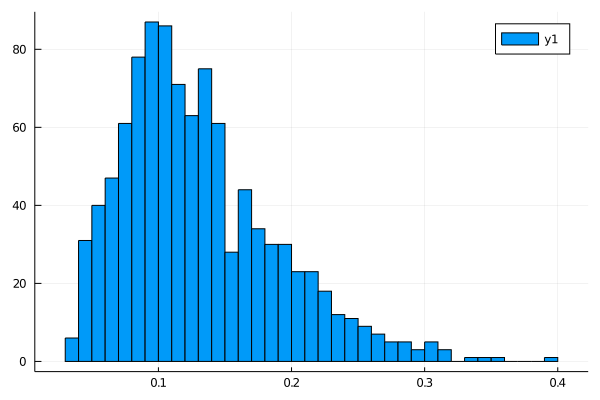

In [142]:
print(mean(1 .- exp.(-y)),'\n')
Plots.histogram(1 .- exp.(-y),bins=50)


In [90]:
cutoff = 10^6
sigma = 0.5
CSI = Array{Array{Float64,1},1}(undef,0)
TP = zeros(length(ips))
FTP = zeros(length(ips))
for i in 1:length(ips)
    t = 0:(length(ips[i])-1)
    CSI1 = cumsum(ips[i] .* exp.(sigma .* t)) .* exp.(-sigma .* t)
    t2 = length(ips[i]):(length(ips[i])+30)
    CSI2 = sum(ips[i] .* exp.(sigma .* t)) .* exp.(-sigma .* t2)
    push!(CSI,vcat(CSI1,CSI2))
    positive = CSI[i] .> cutoff
    nd = 1:length(CSI[i])
    if sum(positive) > 0
        FTP[i] = min(nd[positive .== true]...)
        TP[i] = sum(positive)
    end
end
Plots.plot(TP)
Plots.plot!(FTP)
print(mean(TP[TP .> 0]),'\n')
print(mean(FTP[TP .> 0]))

16.852941176470587
2.588235294117647

In [91]:
ipmean = zeros(1000)
iplength = zeros(1000)
ippresymp = zeros(1000)
for (i, ip) in enumerate(ips)
    ipmean[i] = mean(ip) 
    iplength[i] = length(ip)
    ipmax = max(ip...)
    j = 1
    while ip[j] < ipmax
        j += 1
    end
    ippresymp[i] = j-1
end

In [92]:
Plots.histogram(ipmean)

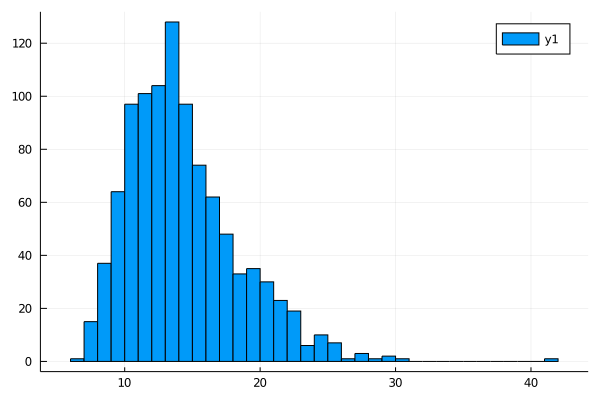

In [21]:
Plots.histogram(iplength)

In [22]:
Plots.p(ippresymp)

LoadError: UndefVarError: p not defined

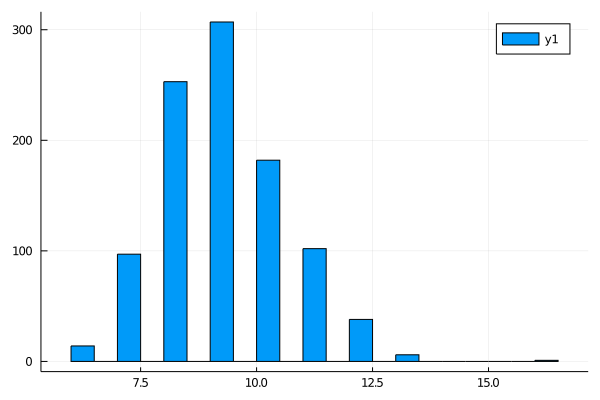

In [23]:
Plots.histogram(iplength .- ippresymp)

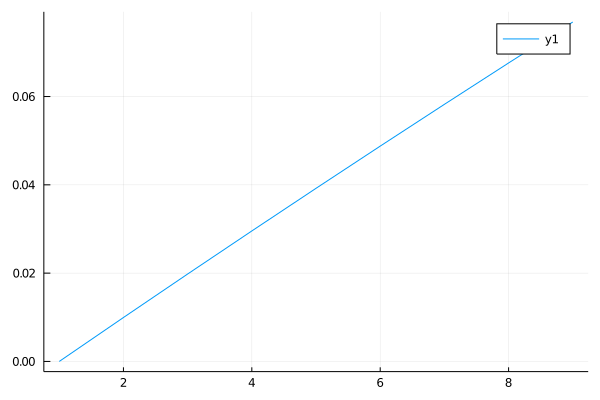

In [24]:
t = [0,1,2,3,4,5,6,7,8]
Plots.plot(1 .- exp.(-0.01*t))

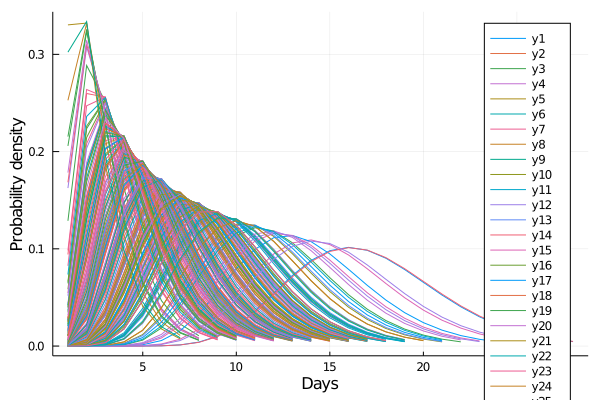

In [26]:
plot_infection_profiles(200,1.0)

#now p is essentially fraction of daily contacts that will be infected over whole period. 
#E.g. R = 1.5 will be NC = 10 and p = 0.15
#

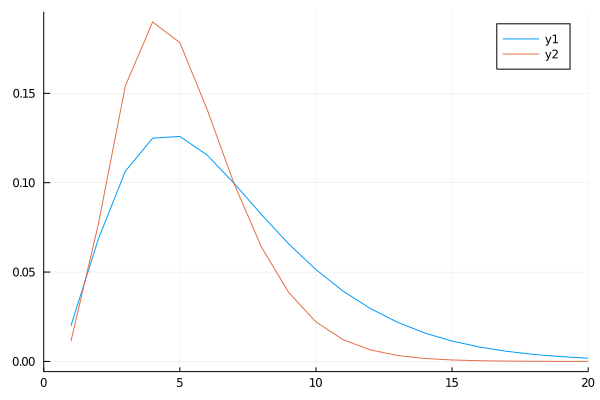

In [40]:
##### meanip = zeros(Int64(max(iplength...)))

for iprof in ips
    meanip[1:length(iprof)] += iprof
end
meanip ./= length(ips)
x = 1:(length(meanip))
Plots.plot(x,meanip,xlim=(0,20))
Plots.plot!(x,pdf.(Gamma(,1.0),x))

1 - e(-b) = p
OR = p/(1-p)
OR = (1-e(-b))/e(-b) = e(b) - 1
b = log(1+OR)